# Getting the Data

#### Import necessary base libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## NOTEBOOK SETTINGS
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# Change max rows shown in data frame
pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

#### Reading in the data

In [2]:
# Read in the data
data = pd.read_csv('/Users/andrewfox/7275 Project/parkinsons_data.csv')

## COLUMN SIMPLIFICATION
# Simplify name column
data['name'] = data['name'].apply(lambda x: x.replace('phon_R01_', ''))

# Add a subject column with just subject section of 'name'
data['subject'] = data['name'].apply(lambda x: x[:3])

# Add a recording column with just the recording number section of 'name'
data['rec'] = data['name'].apply(lambda x: x[-1])

In [3]:
# Show data
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,subject,rec
0,S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,S01,1
1,S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,S01,2
2,S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,S01,3
3,S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,S01,4
4,S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,S01,5


#### Column Descriptions
The following table provides a description of each column .

|Column|Description|
|------|-----------|
|name | subject name and recording number |
|MDVP:Fo(Hz) | average vocal fundamental frequency |
|MDVP:Fhi(Hz) | maximum vocal fundamental frequency |
|MDVP:Flo(Hz) | minimum vocal fundamental frequency |
|MEASURES OF VARIATION IN FREQUENCY | |
|MDVP:Jitter(%) | Percentage of cycle-to-cycle variability of the period duration |
|MDVP:Jitter(Abs) | Absolute value of cycle-to-cycle variability of the period duration |
|MDVP:RAP | Relative measure of the pitch disturbance |
|MDVP:PPQ | Pitch perturbation quotient |
|Jitter:DDP | Average absolute difference of differences between jitter cycles |
|MEASURES OF VARIATION IN AMPLITUDE | |
|MDVP:Shimmer | Variations in the voice amplitdue
|MDVP:Shimmer(dB) | Variations in the voice amplitdue in dB |
|Shimmer:APQ3 | Three point amplitude perturbation quotient measured against the average of the three amplitude |
|Shimmer:APQ5 | Five point amplitude perturbation quotient measured against the average of the three amplitude |
|MDVP:APQ | Amplitude perturbation quotient from MDVP |
|Shimmer:DDA | Average absolute difference between the amplitudes of consecutive periods |
|MEASURES OF RATIO OF NOISE TO TONAL COMPONENTS IN THE VOICE |
|NHR | Noise-to-harmonics Ratio |
|HNR | Harmonics-to-noise Ratio |
|status | health status of subject; 1=parkinsons; 0=healthy |
| TWO NONLINEAR DYNAMICAL COMPLEXITY MEASURES | |
|RPDE | Recurrence period density entropy |
|DFA | detrended fluctuation analysis |
| THREE NONLINEAR MEASURES OF FUNDAMENTAL FREQUENCY VARIATION |
|spread1 | discrete probability distribution of occurrence of relative semitone variations |
|spread2 | 
|D2 | correlation dimension |
|PPE | Pitch Period Entropy; Entropy of the discrete probability distribution of occurrence of relative semitone variations |

# Exploratory Data Analysis

#### Data info

In [4]:
# Show columns, their data types, and whether there are nulls/NAs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### Correlation Matrix

In [5]:
# Generate correlation matrix (does not consider name, subject, and rec columns)
correlations = data.drop(['name', 'subject', 'rec'], axis=1).corr()

# Show how each colum correlates with the target variable
correlations['status'].sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64

#### Correlation Heat Map

<Axes: >

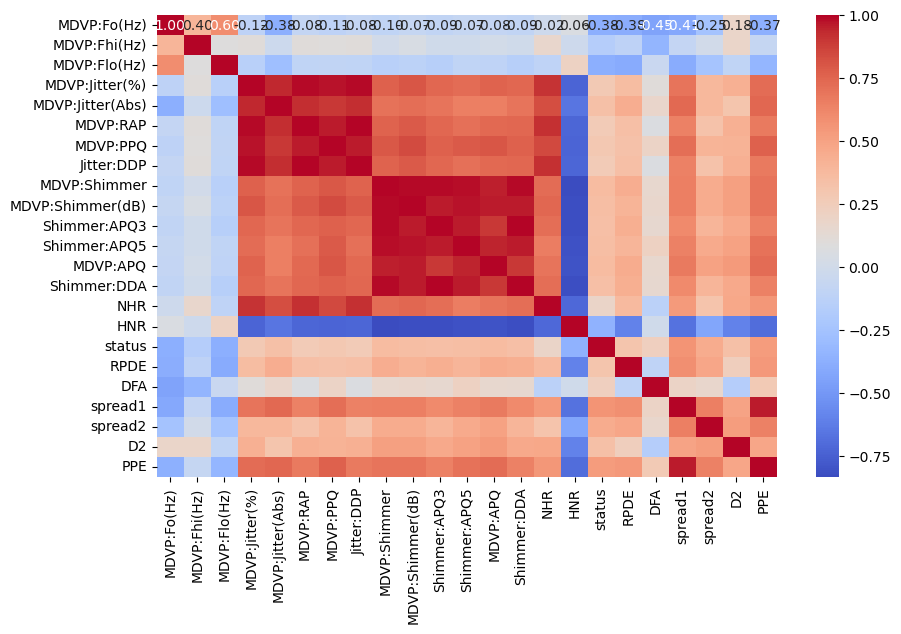

In [6]:
# Generate heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm')

#### Patient Recording Comparison

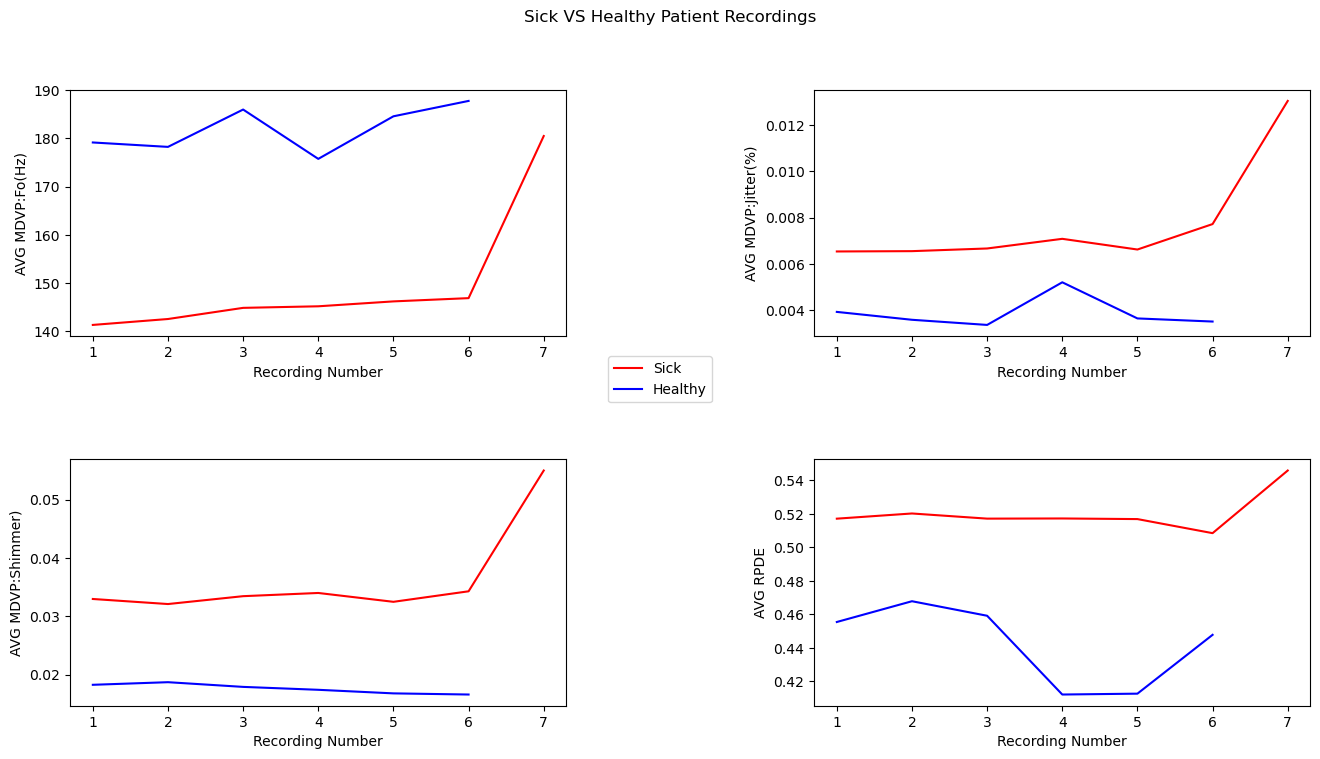

In [7]:
# Separate healthy and sick patients in dataset
healthy = data[data['status'] == 0]
sick = data[data['status'] == 1]

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16,8))

## GENERATE PLOTS
# MDVP:Fo(Hz)
sns.lineplot(data=sick, x='rec', y='MDVP:Fo(Hz)', color='red', errorbar=None, ax=axes[0][0]);
sns.lineplot(data=healthy, x='rec', y='MDVP:Fo(Hz)', color='blue', errorbar=None, ax=axes[0][0]);

axes[0][0].set_ylabel('AVG MDVP:Fo(Hz)')
axes[0][0].set_xlabel('Recording Number')


# MDVP:Jitter(%)
sns.lineplot(data=sick, x='rec', y='MDVP:Jitter(%)', color='red', errorbar=None, ax=axes[0][1]);
sns.lineplot(data=healthy, x='rec', y='MDVP:Jitter(%)', color='blue', errorbar=None, ax=axes[0][1]);

axes[0][1].set_ylabel('AVG MDVP:Jitter(%)')
axes[0][1].set_xlabel('Recording Number')


# MDVP:Shimmer
sns.lineplot(data=sick, x='rec', y='MDVP:Shimmer', color='red', errorbar=None, ax=axes[1][0]);
sns.lineplot(data=healthy, x='rec', y='MDVP:Shimmer', color='blue', errorbar=None, ax=axes[1][0]);

axes[1][0].set_ylabel('AVG MDVP:Shimmer)')
axes[1][0].set_xlabel('Recording Number')


# RPDE
sns.lineplot(data=sick, x='rec', y='RPDE', color='red', errorbar=None, ax=axes[1][1]);
sns.lineplot(data=healthy, x='rec', y='RPDE', color='blue', errorbar=None, ax=axes[1][1]);

axes[1][1].set_ylabel('AVG RPDE')
axes[1][1].set_xlabel('Recording Number')


# Adjust spacing of plots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Sick VS Healthy Patient Recordings")

# Plot Legend
custom_lines = [plt.Line2D([0], [0], color='red', lw=1.5), 
                plt.Line2D([0], [0], color='blue', lw=1.5)]
fig.legend(custom_lines, ['Sick', 'Healthy'], loc='center')

These plots reveal that there may indeed be significant differences in recording components between sick and healthy patients.

# Models

In [7]:
# Import necessary libraries for model building
from sklearn.model_selection import train_test_split #for train and test splits
from sklearn import metrics #for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix #specific metrics

In [8]:
# Define the target variable
y = data['status']

# Define the features
X = data.drop(columns=['name', 'status', 'subject', 'rec'])

### Data split
The dataset is split into 70% training set and 30% testing set

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Feature Selection

Many of the features in the dataset are measurements of different components of vocal recordings. These include measures of fundamental frequency, variation in frequency, variation in amplitude, harmonicity, complexity, and nonlinear variation in fundamental frequency. According to Gabriel Solana-Lavalle, et al. (https://www.sciencedirect.com/science/article/pii/S1746809421000124), the most commonly used features for PD detection are "jitter, shimmer, fundamental frequency parameters, harmonicty parameters, recurrence period density entropy (RPDE), detrended fluctuation analysis (DFA) and pitch period entropy (PPE)." 

Given this, I've decided to use three subsets of features for building the models. `all_features` includes all features in the dataset, `lavalle_features` include all features mentioned in the aforementioned paper, and `select_features` includes one feature from each measured component of vocal recordings.

In [16]:
all_features = X.columns.tolist()

lavalle_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

select_features = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:PPQ', 'MDVP:APQ', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

## Decision Tree
Decision Trees are non-parametric, supervised learning algorithms common in simpler classification problems.

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Dictionary for feature subsets
feature_subsets = {
    'all': all_features,
    'lavalle': lavalle_features,
    'select': select_features
}

# Function to evaluate Decision Tree model
def evaluate_model(X_train, X_test, y_train, y_test, criterion):
    model = DecisionTreeClassifier(criterion=criterion, random_state=23)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

# Initialize results dictionary
results = {}

# Loop through each subset and criterion
for subset_name, features in feature_subsets.items():

    # Ensure the same train-test split for each loop
    X_train_dt = X_train[features]
    X_test_dt = X_test[features]
    
    for criterion in ['gini', 'entropy']:
        accuracy, precision, recall = evaluate_model(X_train_dt, X_test_dt, y_train, y_test, criterion)
        results[(subset_name, criterion)] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall
        }

# Convert results to MultiIndex DataFrame
results_df = pd.DataFrame(results).T
results_df.index.names = ['Feature Subset', 'Criterion']

print(results_df)

                          Accuracy  Precision  Recall
Feature Subset Criterion                             
all            gini       0.915254   0.926829   0.950
               entropy    0.881356   0.866667   0.975
lavalle        gini       0.915254   0.906977   0.975
               entropy    0.915254   0.906977   0.975
select         gini       0.830508   0.840909   0.925
               entropy    0.915254   0.948718   0.925


## Random Forest
Random Forests are an ensemble, supervised learning method that combines multiple decision trees using random subsets of the data.

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Function to evaluate Random Forest model
def evaluate_model(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=23)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

# Initialize results dictionary
results = {}

# Loop through each subset and evaluate the model
for subset_name, features in feature_subsets.items():
    
    # Ensure the same train-test split for each loop
    X_train_rf = X_train[features]
    X_test_rf = X_test[features]
    
    accuracy, precision, recall = evaluate_model(X_train_rf, X_test_rf, y_train, y_test)
    results[(subset_name)] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Convert results to MultiIndex DataFrame
results_df = pd.DataFrame(results).T
results_df.index.names = ['Feature Subset']

print(results_df)

                Accuracy  Precision  Recall
Feature Subset                             
all             0.830508   0.812500   0.975
lavalle         0.830508   0.812500   0.975
select          0.847458   0.829787   0.975


## KNN Classifer
The k-Nearest Neighbors algorithm is a non-parametric, unsupervised learning algorithm that can be used for classification. It requires no assumptions about the data's distribution and is simple to implement and interpret.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #for evaluation metrics

### Normalizing the data
For kNN Classifier and SVM models, the data needs to be normalized.

In [ ]:
from sklearn.preprocessing import StandardScaler #for scaling normalization

# Initialize scaler
scaler = StandardScaler()

# Create scaled X training data and X testing data (all features)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Finding the optimal neighbors (k)

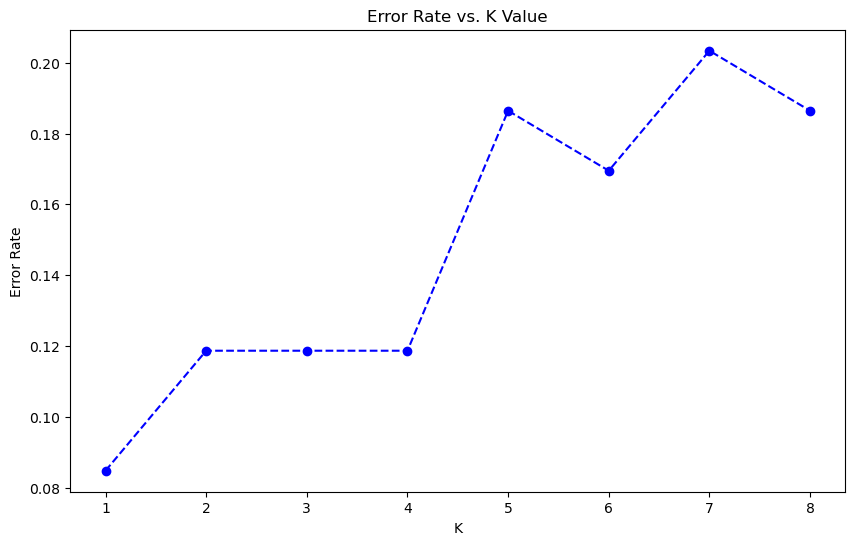

In [29]:
# Get error rates for different k values
error_rate = []
for k in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

# Plot the Error Rate vs K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), error_rate, marker='o', linestyle='dashed', color='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### Building the model
The elbow plot reveals that lower k values are most optimal. A kNN Classifier model is built using k= 1 and 2.

#### k = 1

In [32]:
# Build kNN Classifier model with k = 1
knn1 = KNeighborsClassifier(n_neighbors=1) #intialize model
knn1.fit(X_train_scaled, y_train) #fit model
y1_pred = knn1.predict(X_test_scaled) #predict with model

##### Evaluating the model

In [33]:
# Evaluate model
knn1_accuracy = accuracy_score(y_test, y1_pred)
knn1_classification_rep = classification_report(y_test, y1_pred)
knn1_confusion_mat = confusion_matrix(y_test, y1_pred)

print(f"Accuracy: {knn1_accuracy*100}")
print("Classification Report:")
print(knn1_classification_rep)
print("Confusion Matrix:")
print(knn1_confusion_mat)

Accuracy: 91.52542372881356
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.93      0.95      0.94        40

    accuracy                           0.92        59
   macro avg       0.91      0.90      0.90        59
weighted avg       0.91      0.92      0.91        59

Confusion Matrix:
[[16  3]
 [ 2 38]]


#### k = 2

In [34]:
# Build kNN Classifier model with k = 2
knn2 = KNeighborsClassifier(n_neighbors=2) #intialize model
knn2.fit(X_train_scaled, y_train) #fit model
y2_pred = knn2.predict(X_test_scaled) #predict with model

##### Evaluating the model

In [35]:
# Evaluate model
knn2_accuracy = accuracy_score(y_test, y2_pred)
knn2_classification_rep = classification_report(y_test, y2_pred)
knn2_confusion_mat = confusion_matrix(y_test, y2_pred)

print(f"Accuracy: {knn2_accuracy*100}")
print("Classification Report:")
print(knn2_classification_rep)
print("Confusion Matrix:")
print(knn2_confusion_mat)

Accuracy: 88.13559322033898
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.92      0.90      0.91        40

    accuracy                           0.88        59
   macro avg       0.86      0.87      0.87        59
weighted avg       0.88      0.88      0.88        59

Confusion Matrix:
[[16  3]
 [ 4 36]]


## SVM
Support Vector Machines (SVMs) are supervised learning algorithms that excel with classification problems. 

In [36]:
from sklearn.svm import SVC

In [37]:
# Build SVM model with linear kernel function
svm = SVC(kernel='linear', random_state=42) #initialize model
svm.fit(X_train_scaled, y_train) #fit model
y_pred = svm_model.predict(X_test_scaled) #predict with model

SVC(kernel='linear', random_state=42)

##### Evaluating the Model

In [39]:
# Evaluate Model
svm_accuracy = accuracy_score(y_test, y_pred)
svm_classification_rep = classification_report(y_test, y_pred)
svm_confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {svm_accuracy*100}")
print("Classification Report:")
print(svm_classification_rep)
print("Confusion Matrix:")
print(svm_confusion_mat)

Accuracy: 91.52542372881356
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.93      0.95      0.94        40

    accuracy                           0.92        59
   macro avg       0.91      0.90      0.90        59
weighted avg       0.91      0.92      0.91        59

Confusion Matrix:
[[16  3]
 [ 2 38]]


# Documentation & Review

• Dataset 'parkinsons_data.csv' was downloaded from [Kaggle.com.](https://www.kaggle.com/datasets/jainaru/parkinson-disease-detection) \
• Dataset was uploaded to Jupyter Notebooks project folder. \
• Dataset was read in and the 'name' column was decomposed into its parts for simplicity and future plots. \
• A correlation matrix and heat map was created and plotted. \
• Line plots of average value across 6-7 recordings were plotted to compare healthy and sick patient recordings on these measures: MDVP:Fo(Hz), MDVP:Jitter(%), MDVP:Shimmer, RPDE \
• Three subsets of features were defined for model building. \
• Decision Tree Models were built using both gini index and entropy criterion. They were tested on accuracy, precision, and recall. \
• Random Forest Model was built and tested on accuracy, precision, and recall. \
• Features were normalized for kNN Classifier and SVM models. \
• Error rate and k value were plotted in elbow chart to determine optimal k for model. \
• A kNN Classifer with k=1 and k=2 were buitl and evaluated on precision, recall, f1-score, and support. \
• An SVM model with linear kernel was built and evaluted on precision, recall, f1-score, and support. \

All models were able to perform well in classifying sick patients from healthy ones. Suprisingly, the decision trees performed better than the random forest. Overall, the SVM seems to perform the best, though this project proves that any of these models can accurately classify in this context. 

## Review
All models were able to perform well in classifying sick patients from healthy ones. Suprisingly, the decision trees performed better than the random forest. Overall, the SVM seems to perform the best, though this project proves that any of these models can accurately classify sick and healthy patients of Parkinson's Disease with this sole subset of symptoms: vocal recordings. \
There are a few limitations worth noting. The dataset is not very large, leaving very little in the train and test sets. Moreover, while vocal recordings seem to provide a thorough basis for classifying sick from healthy patients, they does not provide the full picture of Parkinson's Disease nor could they cover the range of factors that contribute to Parkinson's Disease and its diagnosis.

# Citations
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

Gabriel Solana-Lavalle, et al. “Analysis of Voice as an Assisting Tool for Detection of Parkinson’s Disease and Its Subsequent Clinical Interpretation.” Biomedical Signal Processing and Control, Elsevier, 25 Jan. 2021, www.sciencedirect.com/science/article/pii/S1746809421000124. 